# 1ª VERSÃO

In [ ]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# Carregamento da base de dados e exclusão da primeira coluna
base = pd.read_csv('/content/teste.csv')
base.shape

(7, 3)

In [ ]:
base

,ANO,Fat_Total,Tabela
0,2020,146018470,Alpha
1,2023,128970000,Alpha
2,2021,125533500,Alpha
3,2022,103787000,Alpha
4,2019,101198225,Alpha
5,2024,76210000,Alpha
6,2018,43838865,Alpha


In [ ]:
base.drop(columns=['Tabela'], inplace=True)
base.head()

,ANO,Fat_Total
0,2020,146018470
1,2023,128970000
2,2021,125533500
3,2022,103787000
4,2019,101198225


In [ ]:
# Definição das variáveis X e Y, X distância é a variável independente e Y velocidade é a variável dependente
X = base.iloc[:, 0].values.reshape(-1, 1)
y = base.iloc[:, 1].values

In [ ]:
X

array([[2020],
       [2023],
       [2021],
       [2022],
       [2019],
       [2024],
       [2018]])

In [ ]:
y

array([146018470, 128970000, 125533500, 103787000, 101198225,  76210000,
        43838865])

In [ ]:
#formato de matriz com uma coluna a mais
#X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
# Visualização dos coeficientes
modelo.intercept_

-7866702890.892857

In [ ]:
#inclinacao
modelo.coef_

array([3943767.32142857])

In [ ]:
# Previsões
anos_fut = np.array([2024,2025,2026]).reshape(-1, 1)
ven_previstas = modelo.predict(anos_fut)

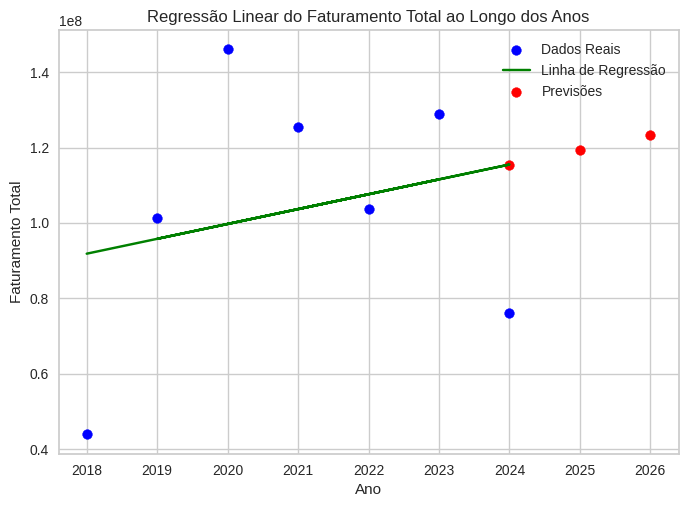

In [ ]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y, color = "blue", label="Dados Reais")
plt.plot(X, modelo.predict(X), color = 'green', label="Linha de Regressão")
plt.scatter(anos_fut, ven_previstas, color='red', label='Previsões')
plt.legend(facecolor='black')
plt.xlabel('Ano')
plt.ylabel('Faturamento Total')
plt.title('Regressão Linear do Faturamento Total ao Longo dos Anos')
plt.show()

In [ ]:
# Previsão utilizando função do sklearn
modelo.predict([[22]])

array([-7.77994001e+09])

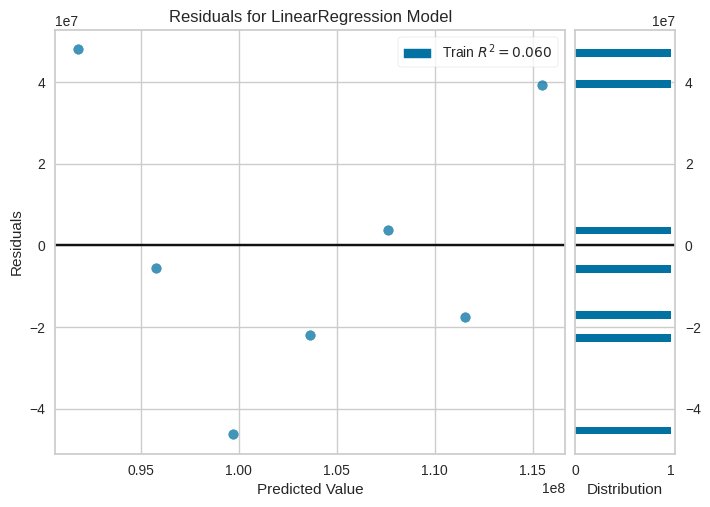

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

# 2ª VERSÃO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Criando dados fictícios
data = {
    'ANO': np.arange(2010, 2021),  # Anos de 2010 a 2020
    'Fat_Total': [50000000, 55000000, 60000000, 70000000, 80000000,
                  85000000, 90000000, 95000000, 100000000, 110000000, 120000000]  # Faturamento total
}

# Criando o DataFrame
base = pd.DataFrame(data)

# Visualizando os dados
print(base)


     ANO  Fat_Total
0   2010   50000000
1   2011   55000000
2   2012   60000000
3   2013   70000000
4   2014   80000000
5   2015   85000000
6   2016   90000000
7   2017   95000000
8   2018  100000000
9   2019  110000000
10  2020  120000000


In [24]:
# Definindo x e y
x = base['ANO'].values.reshape(-1, 1)  # ANO como variável independente
y = base['Fat_Total'].values  # Fat_Total como variável dependente

# Criação do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x, y)

# Coeficientes do modelo
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

print(f'Intercepto: {intercepto:.2f}')
print(f'Coeficiente (slope): {coeficiente:.2f}')


Intercepto: -13655454545.45
Coeficiente (slope): 6818181.82


In [ ]:
# Previsões para anos futuros
anos_futuro = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
vendas_previstas = modelo.predict(anos_futuro)

# Exibir previsões futuras
for ano, previsao in zip(anos_futuro.flatten(), vendas_previstas):
    print(f'Previsão para {ano}: {previsao:.2f}')


Previsão para 2021: 124090909.09
Previsão para 2022: 130909090.91
Previsão para 2023: 137727272.73
Previsão para 2024: 144545454.55
Previsão para 2025: 151363636.36


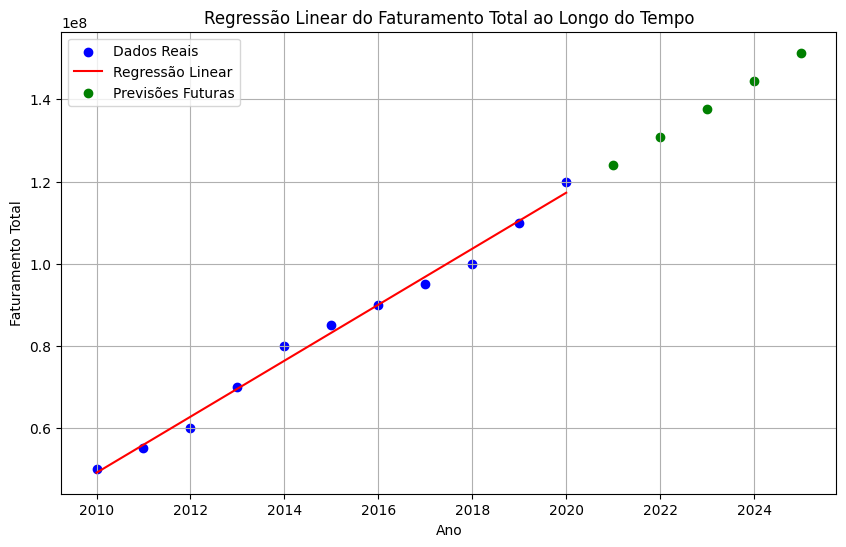

In [ ]:
# Visualização dos dados e da linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(base['ANO'], base['Fat_Total'], color='blue', label='Dados Reais')
plt.plot(base['ANO'], modelo.predict(x), color='red', label='Regressão Linear')
plt.scatter(anos_futuro, vendas_previstas, color='green', label='Previsões Futuras')
plt.xlabel('Ano')
plt.ylabel('Faturamento Total')
plt.title('Regressão Linear do Faturamento Total ao Longo do Tempo')
plt.legend()
plt.grid()
plt.show()
